# Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Exploring Fake News

In [3]:
 fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

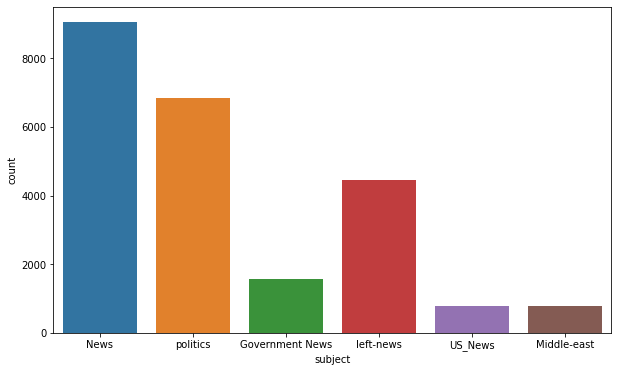

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

## WordCloud

In [8]:
text = ' '.join(fake.text.to_list())

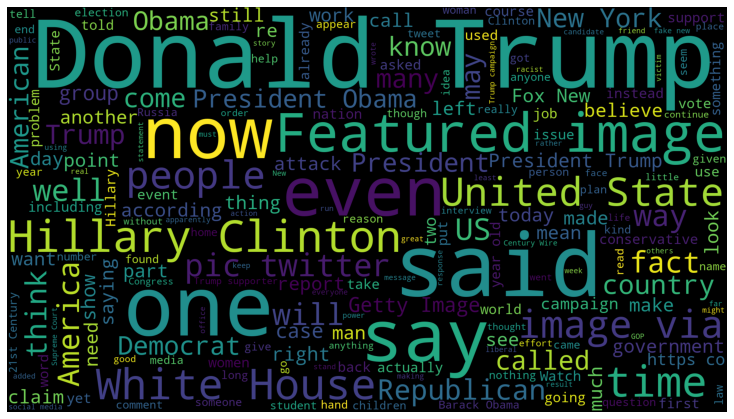

In [9]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Exploring Real News

In [10]:
real =pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [11]:
text = ' '.join(real.text.to_list())

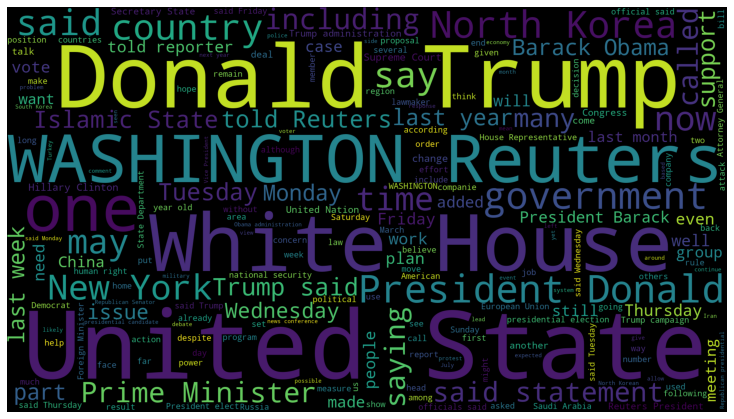

In [12]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Cleaning the data

In [13]:
real.sample(5)

,title,text,subject,date
6517,Pence: Obamacare replacement to come together ...,WASHINGTON (Reuters) - U.S. Vice President-ele...,politicsNews,"January 4, 2017"
17333,Germany's Merkel suffers state vote setback as...,BERLIN/HANOVER (Reuters) - Germany s Social De...,worldnews,"October 14, 2017"
10605,Connecticut cancels pay raises for managers as...,NEW YORK (Reuters) - Connecticut will cancel p...,politicsNews,"February 29, 2016"
3960,Trump's nominee for China ambassador takes tou...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"May 2, 2017"
17685,U.S. Tillerson assures Washington's only goal ...,MOSCOW (Reuters) - U.S. Secretary of State Rex...,worldnews,"October 12, 2017"


In [14]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [15]:
unknown_publishers

[7,
 8,
 12,
 13,
 14,
 17,
 27,
 40,
 67,
 70,
 97,
 122,
 140,
 155,
 156,
 192,
 222,
 233,
 252,
 257,
 284,
 308,
 321,
 362,
 384,
 412,
 453,
 459,
 495,
 531,
 838,
 851,
 1076,
 1081,
 1112,
 1146,
 1179,
 1341,
 1381,
 1451,
 1509,
 1522,
 1523,
 1539,
 1570,
 1611,
 1645,
 1657,
 1659,
 1696,
 1711,
 1726,
 1730,
 1748,
 1768,
 1824,
 1826,
 1878,
 1885,
 1932,
 1952,
 1967,
 2012,
 2023,
 2056,
 2087,
 2100,
 2102,
 2120,
 2140,
 2171,
 2187,
 2247,
 2262,
 2275,
 2313,
 2315,
 2355,
 2383,
 2392,
 2442,
 2486,
 2510,
 2518,
 2557,
 2602,
 2658,
 2776,
 2811,
 2855,
 2885,
 2922,
 3107,
 3248,
 3270,
 3466,
 3488,
 3597,
 3615,
 3782,
 3835,
 3930,
 3944,
 3976,
 4170,
 4198,
 4206,
 4307,
 4358,
 4465,
 4554,
 4753,
 5246,
 5290,
 5316,
 5379,
 5380,
 5412,
 5504,
 5538,
 5588,
 5593,
 5633,
 5761,
 5784,
 5794,
 5796,
 5823,
 5866,
 5997,
 6026,
 6065,
 6075,
 6524,
 6573,
 6660,
 6823,
 7259,
 7353,
 7463,
 7568,
 7715,
 7766,
 7816,
 7890,
 7915,
 7922,
 8118,
 8127,
 8

In [16]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [17]:
real.drop(8970, axis=0)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [18]:
publishers = []
tmp_text= []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publishers.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    publishers.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [19]:
real['publishers'] = publishers
real['text'] = tmp_text

In [20]:
real.head()

,title,text,subject,date,publishers
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [21]:
real.shape

(21417, 5)

In [22]:
empty_fake_index = [index for index, text in enumerate(fake.text.to_list()) if str(text).strip()==""]

In [23]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [24]:
real['text'] = real['title'] + " " + real['text']

In [25]:
fake['text'] = fake['title'] + " " + fake['text']

In [26]:
# convert everything into lowercase
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

## Preprocessing text

In [27]:
real['class']=1
fake['class']=0

In [28]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publishers', 'class'], dtype='object')

In [29]:
real = real[['text', 'class']]

In [30]:
fake = fake[['text', 'class']]

In [31]:
data = real.append(fake, ignore_index=True)

In [32]:
data.sample(10)

,text,class
42771,you wouldn’t allow someone to abuse your child...,0
26878,"report: if trump builds a border wall, we’ll ...",0
6385,trump accuses u.s. spy agencies of nazi practi...,1
34778,hysterical! two trump supporters had the best ...,0
37470,disgraceful! senator john mccain swipes at tru...,0
9914,puerto rico rescue falters under attack by con...,1
37695,pelosi lied about “affordable” healthcare and ...,0
18808,brexit bill gives uk ministers 'excessively wi...,1
21988,obama just made a surprise appearance at a ra...,0
30916,air force error allowed texas church gunman to...,0


In [33]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


     |████████████████████████████████| 10.4 MB 4.4 MB/s 
     |████████████████████████████████| 2.2 MB 37.3 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 5.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-ov766fns
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip

In [34]:
import preprocess_kgptalkie as ps

In [35]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [36]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


## Vectorization: Word2Vec

### Vectorization -- Word2Vec

Word2Vec is one of the most popular techniques to learn word emndeddings using shallow neural networks. It was developed by Tomas Mikolov in 2013 at Google

Word embedding is the most popular representation of document vocabulary. It is capable of capturing context of a word in a document semantic and syntactic similarity with other words, etc

In [37]:
import gensim

In [38]:
y = data['class'].values

In [39]:
X= [d.split() for d in data['text'].to_list()]

In [40]:
dim =100

w2v_model = gensim.models.Word2Vec(sentences=X, size=dim, window=10, min_count=1)

In [41]:
len(w2v_model.wv.vocab)

231911

In [42]:
w2v_model.wv.vocab

{'as': <gensim.models.keyedvectors.Vocab at 0x7f52bd2c6610>,
 'us': <gensim.models.keyedvectors.Vocab at 0x7f528ef00b10>,
 'budget': <gensim.models.keyedvectors.Vocab at 0x7f528ef00710>,
 'fight': <gensim.models.keyedvectors.Vocab at 0x7f528ef006d0>,
 'looms': <gensim.models.keyedvectors.Vocab at 0x7f522620fa50>,
 'republicans': <gensim.models.keyedvectors.Vocab at 0x7f522620fe10>,
 'flip': <gensim.models.keyedvectors.Vocab at 0x7f522620f990>,
 'their': <gensim.models.keyedvectors.Vocab at 0x7f522620fe50>,
 'fiscal': <gensim.models.keyedvectors.Vocab at 0x7f522620f910>,
 'script': <gensim.models.keyedvectors.Vocab at 0x7f522620fd10>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f522620fb50>,
 'head': <gensim.models.keyedvectors.Vocab at 0x7f522620ff50>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f522620fa90>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f522620fb90>,
 'conservative': <gensim.models.keyedvectors.Vocab at 0x7f522620fd50>,
 'republican': <gensim.models.keyedvector

In [43]:
w2v_model.wv['us']

array([-3.6418056 ,  1.6139565 ,  0.7933153 , -2.0734587 ,  0.1548071 ,
        0.24175668, -4.667798  ,  2.1116455 ,  0.725616  ,  0.9464745 ,
        2.0633628 , -1.8005729 ,  1.1937429 , -0.75722665,  0.1961124 ,
       -1.7781683 , -1.3500814 ,  0.5536283 , -3.1542318 ,  0.92811275,
        3.2614782 ,  0.75075424,  2.1439805 ,  2.7097697 , -0.02238184,
       -0.44277328, -0.6143009 , -1.3422184 ,  0.8130768 , -1.9752462 ,
        2.4715457 , -0.6681919 , -1.4285    ,  0.4141227 ,  0.24626617,
       -2.6638334 ,  2.1118503 , -1.9836464 , -1.0221527 ,  1.6855929 ,
       -0.04000521, -1.2816365 , -2.3519218 ,  1.5627452 , -1.5621779 ,
        4.326086  , -1.150974  , -3.4438882 , -0.8357393 ,  0.5652065 ,
        0.9839023 , -1.4468323 , -3.0869806 , -1.1825733 , -1.8753468 ,
        3.0556653 , -0.53481436,  0.44014192,  0.30820253, -0.5486208 ,
       -1.540617  , -1.363604  , -1.0753586 , -1.4482654 , -0.5686789 ,
       -1.8053141 ,  1.6277572 ,  0.27522448,  1.6491153 ,  0.27

In [44]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X)

In [45]:
X = tokenizer.texts_to_sequences(X)

In [46]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

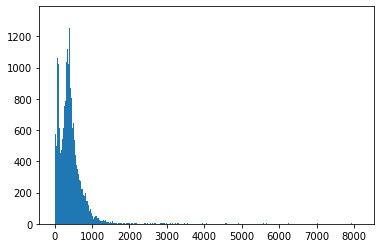

In [47]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [48]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1584

In [49]:
maxlen = 700
X = pad_sequences(X, maxlen=maxlen)

In [50]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [51]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, dim))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [52]:
embedding_vectors = get_weight_matrix(w2v_model)

In [53]:
embedding_vectors.shape

(231912, 100)

In [54]:
model = Sequential()

model.add(Embedding(vocab_size, output_dim=dim, weights =[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          23191200  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,308,577
Trainable params: 117,377
Non-trainable params: 23,191,200
_________________________________________________________________


In [56]:
X_train, X_test,y_train,y_test = train_test_split(X,y)

In [57]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 99s 125ms/step - loss: 0.1429 - acc: 0.9488 - val_loss: 0.0756 - val_acc: 0.9780
Epoch 2/6
737/737 [==============================] - 91s 124ms/step - loss: 0.0735 - acc: 0.9759 - val_loss: 0.0853 - val_acc: 0.9671
Epoch 3/6
737/737 [==============================] - 91s 124ms/step - loss: 0.0458 - acc: 0.9857 - val_loss: 0.0560 - val_acc: 0.9818
Epoch 4/6
737/737 [==============================] - 91s 124ms/step - loss: 0.0247 - acc: 0.9922 - val_loss: 0.0415 - val_acc: 0.9872
Epoch 5/6
737/737 [==============================] - 91s 124ms/step - loss: 0.0243 - acc: 0.9918 - val_loss: 0.0337 - val_acc: 0.9891
Epoch 6/6
737/737 [==============================] - 91s 123ms/step - loss: 0.0124 - acc: 0.9958 - val_loss: 0.0323 - val_acc: 0.9887


In [58]:
y_pred = (model.predict(X_test)>=0.5).astype(int)

In [59]:
accuracy_score(y_test, y_pred)

0.9893095768374165

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5889
           1       0.99      0.98      0.99      5336

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



## Detect new data

In [63]:
x = ["The fake news spread during the first 6 months of the COVID-19 pandemic in Brazil were characterized by political content as well as misinformation about the number of cases and deaths and about prevention measures and treatment. The main dissemination channels were WhatsApp and Facebook, with the use of messages, images, and videos, with greater reach in the Southeast and Northeast of Brazil."]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen=maxlen)
(model.predict(x)>0.5.astype(int)


array([[1]])

In [67]:
x = ["Although the tree octopus is not officially listed on the Endangered Species List, we feel that it should be added since its numbers are at a critically low level for its breeding needs. The reasons for this dire situation include: decimation of habitat by logging and suburban encroachment; building of roads that cut off access to the water which it needs for spawning; predation by foreign species such as house cats; and booming populations of its natural predators, including the bald eagle and sasquatch. What few that make it to the Canal are further hampered in their reproduction by the growing problem of pollution from farming and residential run-off. Unless immediate action is taken to protect this species and its habitat, the Pacific Northwest tree octopus will be but a memory.The possibility of Pacific Northwest tree octopus extinction is not an unwarranted fear. Other tree octopus species—including the Douglas octopus and the red-ringed madrona sucker—were once abundant throughout the Cascadia region, but have since gone extinct because of threats similar to those faced by paxarbolis, as well as overharvesting by the now-illegal tree octopus trade."]


x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen=maxlen)
(model.predict(x)>0.5).astype(int)

array([[0]])